In [1]:
import matplotlib.pylab as plt
import pandas as pd
import torch.nn as nn
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from scipy import stats
import torch.nn.functional as F
import torch
torch.set_default_tensor_type('torch.FloatTensor')
import torch.autograd as autograd
from torch import optim
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader

In [2]:
dataset = pd.read_csv(filepath_or_buffer='spambase/spambase.data', header = None)
inputs_indx = [x for x in range(57)]
label_indx = 57
print(len(dataset))
dataset.drop_duplicates()
print(len(dataset))
dataset[54]

4601
4601


0        3.756
1        5.114
2        9.821
3        3.537
4        3.537
5        3.000
6        1.671
7        2.450
8        9.744
9        1.729
10       1.312
11       1.243
12       3.728
13       2.083
14       1.971
15       5.659
16       4.652
17      35.461
18       1.320
19       3.509
20       3.833
21       2.569
22       4.857
23       1.131
24       5.466
25       2.565
26       5.466
27       2.611
28       4.000
29       2.687
         ...  
4571     1.256
4572     1.000
4573     1.489
4574     1.220
4575     1.720
4576     1.488
4577     1.200
4578     1.372
4579     3.766
4580     1.571
4581     1.586
4582     1.266
4583     1.666
4584     1.500
4585     1.375
4586     1.793
4587     1.272
4588     1.111
4589     1.000
4590     2.468
4591     1.000
4592     1.285
4593     1.000
4594     1.727
4595     1.000
4596     1.142
4597     1.555
4598     1.404
4599     1.147
4600     1.250
Name: 54, Length: 4601, dtype: float64

In [ ]:
scaler = preprocessing.StandardScaler()
dataset.loc[:, inputs_indx] = scaler.fit_transform(dataset.loc[:, inputs_indx])
print(len(scaler.mean_))
dataset[0]

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i], bins = 15)
    plt.title(i+1)
plt.savefig('hist1.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i + 25], bins = 15)
    plt.title(i + 26)
plt.savefig('hist2.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.hist(dataset[i + 50], bins = 15)
    plt.title(i + 51)
plt.savefig('hist3.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i], vert=False)
    plt.title(i+1)
plt.savefig('box1.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i + 25], vert=False)
    plt.title(i + 26)
plt.savefig('box2.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset[i + 50], vert=False)
    plt.title(i + 51)
plt.savefig('box3.png', bbox_inches='tight')

In [ ]:
outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset[dataset[57] == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset[dataset[57] == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('outlier_goodbad.png', bbox_inches='tight')

In [ ]:
respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset[dataset[57] == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset[dataset[57] == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('hist_gengoodspam.png', bbox_inches='tight')

In [3]:
corr_of_dataset = np.array(dataset.corr())

In [ ]:
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_corr.png', bbox_inches='tight')

In [ ]:
spearman_of_dataset = np.array(dataset.corr(method='spearman'))
plt.figure(figsize=(18,11))
mask = np.zeros_like(spearman_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(spearman_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_spearman.png', bbox_inches='tight')

In [ ]:
kendal_of_dataset = np.array(dataset.corr(method='kendall'))
plt.figure(figsize=(18,11))
mask = np.zeros_like(kendal_of_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(kendal_of_dataset, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_kendal.png', bbox_inches='tight')

In [ ]:
atr_to_scatter = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 56], [37, 55], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33], [54, 55]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(atr_to_scatter)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset[atr_to_scatter[i][0]], dataset[atr_to_scatter[i][1]])
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1]))
plt.savefig('scatter_diag.png', bbox_inches='tight')

In [4]:
clf = svm.OneClassSVM(kernel="rbf")
clf.fit(dataset[inputs_indx])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [5]:
OUTLIER_FRACTION = 0.05
dist_to_border = clf.decision_function(dataset[inputs_indx]).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

(array([177.,  12.,   6.,   5.,   6.,   4.,   1.,   5.,   3.,   1.,   3.,
          4.,   1.,   2.,   1.]),
 array([-6.3928493 , -6.39156876, -6.39028822, -6.38900768, -6.38772714,
        -6.3864466 , -6.38516607, -6.38388553, -6.38260499, -6.38132445,
        -6.38004391, -6.37876337, -6.37748283, -6.37620229, -6.37492175,
        -6.37364121]),
 <a list of 15 Patch objects>)

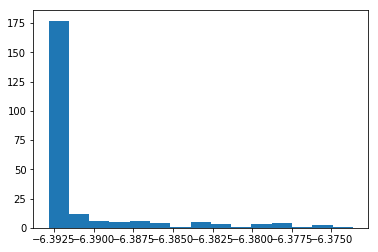

In [6]:
plt.hist(dist_to_border[is_inlier == False], bins = 15)

In [7]:
dataset_outlier = dataset[is_inlier == False]
dataset_clear = dataset[is_inlier == True]
print(len(dataset)*0.01)
print(len(dataset)*0.99)
print(len(dataset_outlier))
print(len(dataset_clear))
dataset_clear.head()

46.01
4554.99
231
4370


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.00,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15,54,1


outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_clear[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_clear[dataset_clear[57] == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_clear[dataset_clear[57] == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('after_svm_outlier_goodbad.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_clear[i], vert=False)
    plt.title(i+1)
plt.savefig('box1.png', bbox_inches='tight')

plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_clear[i + 25], vert=False)
    plt.title(i + 26)
plt.savefig('box2.png', bbox_inches='tight')

plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset_clear[i + 50], vert=False)
    plt.title(i + 51)
plt.savefig('box3.png', bbox_inches='tight')

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_clear[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_clear[dataset_clear[57] == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_clear[dataset_clear[57] == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('after_svm_hist_gengoodspam.png', bbox_inches='tight')

In [8]:
dataset_clear.loc[:, inputs_indx] = preprocessing.minmax_scale(dataset_clear.loc[:, inputs_indx])
dataset_clear.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.081253,0.000000,0.000000,0.004138,0.045045,0.030476,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.084608,...,0.0,0.025014,0.0,0.038851,0.029985,0.003656,0.006177,0.075075,0.112994,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.056706,...,0.0,0.025962,0.0,0.014308,0.000000,0.000000,0.003809,0.029279,0.020904,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.056706,...,0.0,0.025583,0.0,0.014099,0.000000,0.000000,0.003809,0.029279,0.020904,1
5,0.000000,0.000000,0.000000,0.0,0.185,0.000000,0.000000,0.166517,0.000000,0.000000,...,0.0,0.042259,0.0,0.000000,0.000000,0.000000,0.003003,0.010511,0.005831,1


In [9]:
dataset_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 0 to 4600
Data columns (total 58 columns):
0     4370 non-null float64
1     4370 non-null float64
2     4370 non-null float64
3     4370 non-null float64
4     4370 non-null float64
5     4370 non-null float64
6     4370 non-null float64
7     4370 non-null float64
8     4370 non-null float64
9     4370 non-null float64
10    4370 non-null float64
11    4370 non-null float64
12    4370 non-null float64
13    4370 non-null float64
14    4370 non-null float64
15    4370 non-null float64
16    4370 non-null float64
17    4370 non-null float64
18    4370 non-null float64
19    4370 non-null float64
20    4370 non-null float64
21    4370 non-null float64
22    4370 non-null float64
23    4370 non-null float64
24    4370 non-null float64
25    4370 non-null float64
26    4370 non-null float64
27    4370 non-null float64
28    4370 non-null float64
29    4370 non-null float64
30    4370 non-null float64
31    4370 non-null float

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_clear[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_clear[dataset_clear[57] == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_clear[dataset_clear[57] == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('scale_hist_gengoodspam.png', bbox_inches='tight')

outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_clear[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_clear[dataset_clear[57] == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_clear[dataset_clear[57] == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('scale_outlier_goodbad.png', bbox_inches='tight')

atr_to_scatter = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 56], [37, 55], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33], [54, 55]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(atr_to_scatter)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset_clear[atr_to_scatter[i][0]], dataset_clear[atr_to_scatter[i][1]])
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1]))
plt.savefig('scale_scatter_diag.png', bbox_inches='tight')

corr_of_dataset_clear = np.array(dataset_clear.corr())
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset_clear)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset_clear, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_corr_clear.png', bbox_inches='tight')

In [10]:
end_dataset = PCA(n_components=50).fit_transform(dataset_clear[inputs_indx])
end_dataset = pd.DataFrame(end_dataset)

corr_features = features.corr()
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_features)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_features, vmin=-1, vmax=1, linewidths=0.1, cmap="YlGnBu", mask=mask)
plt.savefig('heat_corr_features.png', bbox_inches='tight')

In [11]:
end_dataset[50] = np.array(dataset_clear[57])
end_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 51 columns):
0     4370 non-null float64
1     4370 non-null float64
2     4370 non-null float64
3     4370 non-null float64
4     4370 non-null float64
5     4370 non-null float64
6     4370 non-null float64
7     4370 non-null float64
8     4370 non-null float64
9     4370 non-null float64
10    4370 non-null float64
11    4370 non-null float64
12    4370 non-null float64
13    4370 non-null float64
14    4370 non-null float64
15    4370 non-null float64
16    4370 non-null float64
17    4370 non-null float64
18    4370 non-null float64
19    4370 non-null float64
20    4370 non-null float64
21    4370 non-null float64
22    4370 non-null float64
23    4370 non-null float64
24    4370 non-null float64
25    4370 non-null float64
26    4370 non-null float64
27    4370 non-null float64
28    4370 non-null float64
29    4370 non-null float64
30    4370 non-null float64
31    4370 non-null float

outlier_list = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(outlier_list) * 3):
    plt.subplot(len(outlier_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(features[outlier_list[k] - 1], vert=False)
        plt.title('gen, ' + str(outlier_list[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((features[labels == 0])[outlier_list[k] - 1], vert=False)
        plt.title('good, ' + str(outlier_list[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((features[labels == 1])[outlier_list[k] - 1], vert=False)
        plt.title('spam, ' + str(outlier_list[k]))
        k += 1
plt.savefig('end_outlier_goodbad.png', bbox_inches='tight')

respective_list = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(respective_list) * 3):
    plt.subplot(len(respective_list), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(features[respective_list[k] - 1], bins=15)
        plt.title('gen, ' + str(respective_list[k]))
    if (i+1) % 3 == 2:
        plt.hist((features[labels == 0])[respective_list[k] - 1], bins=15)
        plt.title('good, ' + str(respective_list[k]))
    if (i+1) % 3 == 0:
        plt.hist((features[labels == 1])[respective_list[k] - 1], bins=15)
        plt.title('spam, ' + str(respective_list[k]))
        k += 1
plt.savefig('end_scale_hist_gengoodspam.png', bbox_inches='tight')

atr_to_scatter = [[6, 26], [14, 32], [21, 46], [2, 47], [44, 45], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 16], [37, 35], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33]] #high corr
plt.figure(figsize=(23, 10))
for i in range(len(atr_to_scatter)):
    plt.subplot(3, 5, i+1)
    plt.scatter(features[atr_to_scatter[i][0]], features[atr_to_scatter[i][1]])
    plt.title('x: '+str(atr_to_scatter[i][0])+' y: '+str(atr_to_scatter[i][1]))
plt.savefig('end_scale_scatter_diag.png', bbox_inches='tight')

In [12]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data.iloc[idx]

In [13]:
nonspam_end_dataset = end_dataset[end_dataset[50] == 0]
spam_end_dataset = end_dataset[end_dataset[50] == 1]
nonspam_end_dataset = nonspam_end_dataset.reindex()
spam_end_dataset= spam_end_dataset.reindex()

In [14]:
rand_indxs_spam = np.arange(len(spam_end_dataset))
rand_indxs_nonspam = np.arange(len(nonspam_end_dataset))

np.random.shuffle(rand_indxs_spam)
np.random.shuffle(rand_indxs_nonspam)

f_threshold_spam = int(len(spam_end_dataset)*0.6)
s_threshold_spam = int(len(spam_end_dataset)*0.9)

f_threshold_nonspam = int(len(nonspam_end_dataset)*0.6)
s_threshold_nonspam = int(len(nonspam_end_dataset)*0.9)

learn_dataset = pd.concat([spam_end_dataset.iloc[rand_indxs_spam[:f_threshold_spam]],
                          nonspam_end_dataset.iloc[rand_indxs_nonspam[:f_threshold_nonspam]]])

valid_dataset = pd.concat([spam_end_dataset.iloc[rand_indxs_spam[f_threshold_spam:s_threshold_spam]],
                          nonspam_end_dataset.iloc[rand_indxs_nonspam[f_threshold_nonspam:s_threshold_nonspam]]])

test_dataset = pd.concat([spam_end_dataset.iloc[rand_indxs_spam[s_threshold_spam:]],
                          nonspam_end_dataset.iloc[rand_indxs_nonspam[s_threshold_nonspam:]]])

print(len(learn_dataset), len(valid_dataset), len(test_dataset), len(learn_dataset)+len(valid_dataset)+len(test_dataset), len(end_dataset))

2621 1311 438 4370 4370


In [15]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 192 to 1775
Data columns (total 51 columns):
0     438 non-null float64
1     438 non-null float64
2     438 non-null float64
3     438 non-null float64
4     438 non-null float64
5     438 non-null float64
6     438 non-null float64
7     438 non-null float64
8     438 non-null float64
9     438 non-null float64
10    438 non-null float64
11    438 non-null float64
12    438 non-null float64
13    438 non-null float64
14    438 non-null float64
15    438 non-null float64
16    438 non-null float64
17    438 non-null float64
18    438 non-null float64
19    438 non-null float64
20    438 non-null float64
21    438 non-null float64
22    438 non-null float64
23    438 non-null float64
24    438 non-null float64
25    438 non-null float64
26    438 non-null float64
27    438 non-null float64
28    438 non-null float64
29    438 non-null float64
30    438 non-null float64
31    438 non-null float64
32    438 non-null float64
3

In [16]:
learn_spam_data = np.array(MyDataset(learn_dataset))
valid_spam_data = np.array(MyDataset(valid_dataset))
test_spam_data = np.array(MyDataset(test_dataset))
learn_dataloader = DataLoader(learn_spam_data, batch_size=1, shuffle=True)
valid_dataloader = DataLoader(valid_spam_data, batch_size=len(valid_spam_data), shuffle=False)
test_dataloader = DataLoader(test_spam_data, batch_size=len(test_spam_data), shuffle=False)

In [17]:
learn_spam_data.shape

(2621, 51)

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(50, 20)
        self.lin2 = nn.Linear(20, 10)
        self.lin3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.tanh(self.lin1(x))
        x = F.tanh(self.lin2(x))
        x = F.sigmoid(self.lin3(x))
        return x

net = Net()
net

Net(
  (lin1): Linear(in_features=50, out_features=20, bias=True)
  (lin2): Linear(in_features=20, out_features=10, bias=True)
  (lin3): Linear(in_features=10, out_features=1, bias=True)
)

In [19]:
#Инициализация весов
stds = [(2/(50+20+1))**(1/2), (2/(20+10+1))**(1/2), (32/(10+1+1))**(1/2)]
null_weigth = []
stds.reverse()
def get_weights(layer):
    if (type(layer) == nn.Linear):
        null_weigth.append(torch.randn(layer.weight.data.shape)*stds.pop())
net.apply(get_weights)
null_weigth.reverse()
null_weigth

[
 -1.5863 -0.1520  1.6800 -0.4292  3.9021  2.5049 -2.6830 -2.1297 -0.6220  0.0988
 [torch.FloatTensor of size 1x10], 
 
 Columns 0 to 9 
  0.3449  0.1504  0.1065 -0.5611  0.1078  0.0087  0.0637  0.0882 -0.5131  0.3355
  0.0392  0.0495  0.0455 -0.2047  0.1758  0.2548 -0.2981 -0.0260  0.1092 -0.2205
  0.1925 -0.2825  0.2007  0.0188  0.3427 -0.0554  0.5184  0.1396  0.3375 -0.0684
 -0.2315 -0.0823 -0.0688 -0.0057 -0.1077  0.1615 -0.0201 -0.0688 -0.0404 -0.3906
 -0.0432  0.1595  0.4263  0.3102  0.4861  0.0921 -0.1339 -0.4441  0.2341  0.4753
 -0.3038  0.1272 -0.0907 -0.1099  0.3218  0.1310 -0.1328  0.0560  0.1582  0.2746
 -0.2597 -0.1334 -0.4258 -0.0162 -0.4272 -0.0034  0.3789  0.2745  0.0859  0.6288
 -0.1093 -0.0827  0.4269  0.2689  0.0135  0.0223 -0.2033 -0.1155 -0.1953  0.0516
 -0.1081 -0.1939 -0.2916  0.0188  0.0081 -0.3438  0.1143  0.1347  0.0330  0.0682
 -0.0447  0.4184  0.0998 -0.0211  0.3387  0.2251  0.0835  0.0306  0.1368 -0.3740
 
 Columns 10 to 19 
  0.1546 -0.1310 -0.1458 -0.210

In [20]:
tmp_null_weigth = null_weigth.copy()
def init_weigths(layer):
    if(type(layer) == nn.Linear):
        layer.weight.data = tmp_null_weigth.pop()
net.apply(init_weigths)
net.lin2.weight.data



Columns 0 to 9 
 0.3449  0.1504  0.1065 -0.5611  0.1078  0.0087  0.0637  0.0882 -0.5131  0.3355
 0.0392  0.0495  0.0455 -0.2047  0.1758  0.2548 -0.2981 -0.0260  0.1092 -0.2205
 0.1925 -0.2825  0.2007  0.0188  0.3427 -0.0554  0.5184  0.1396  0.3375 -0.0684
-0.2315 -0.0823 -0.0688 -0.0057 -0.1077  0.1615 -0.0201 -0.0688 -0.0404 -0.3906
-0.0432  0.1595  0.4263  0.3102  0.4861  0.0921 -0.1339 -0.4441  0.2341  0.4753
-0.3038  0.1272 -0.0907 -0.1099  0.3218  0.1310 -0.1328  0.0560  0.1582  0.2746
-0.2597 -0.1334 -0.4258 -0.0162 -0.4272 -0.0034  0.3789  0.2745  0.0859  0.6288
-0.1093 -0.0827  0.4269  0.2689  0.0135  0.0223 -0.2033 -0.1155 -0.1953  0.0516
-0.1081 -0.1939 -0.2916  0.0188  0.0081 -0.3438  0.1143  0.1347  0.0330  0.0682
-0.0447  0.4184  0.0998 -0.0211  0.3387  0.2251  0.0835  0.0306  0.1368 -0.3740

Columns 10 to 19 
 0.1546 -0.1310 -0.1458 -0.2107 -0.1383  0.0111  0.0809 -0.4814 -0.1141  0.4612
 0.5705  0.2660 -0.3007 -0.1782  0.2357 -0.1380 -0.0973 -0.2675 -0.4449  0.1883
 0.

In [21]:
criterion = nn.BCELoss(size_average=True)
optimizer = optim.SGD(net.parameters(), lr=0.1)

In [22]:
feature_index = np.arange(50)
feature_index
label_indx = 50

In [23]:
for valid_data in valid_dataloader:
        features_valid, labels_valid = valid_data[:, feature_index], valid_data[:, label_indx]
        features_valid, labels_valid  = autograd.Variable(features_valid).float(), autograd.Variable(labels_valid).float()
        outputs_valid = net(features_valid)
        loss = criterion(outputs_valid, labels_valid)
loss

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([1311])) that is different to the input size (torch.Size([1311, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Variable containing:
 0.7104
[torch.FloatTensor of size 1]

In [ ]:
feature_index
learn_epoch_loss = []
for epoch in range(1):#10**5:
    loss_acc = 0
    
    optimizer.zero_grad()
    for learn_data in learn_dataloader:
        features_learn, labels_learn = learn_data[:, feature_index], learn_data[:, label_indx]
        features_learn, labels_learn  = autograd.Variable((features_learn).float()).unsqueeze(1), autograd.Variable(torch.from_numpy(labels_learn).float()).unsqueeze(1)
        outputs_learn = net(features_learn)
        loss_learn = criterion(outputs_learn, labels_learn)
        loss_learn.backward()
        optimizer.step()
        loss_acc += float(loss_learn.data)
        
        
    learn_epoch_loss.append(loss_acc/len(learn_dataloader))
        
    plt.grid(True)
    plt.plot(err_epoh, color='r') 
    plt.plot(valid_err_epoh, color='b') 
    plt.plot(test_err_epoh, color='g') 

    display.clear_output(wait=True) 
    display.display(plt.gcf()) 

    print(epoch, end=" ")
        
    learn_epoh_loss.append(loss_acc)
    
plt.plot(learn_epoh_loss)

In [ ]:
#delta_weight = 10
#while delta_weight > np.exp(-5):
#    for data in learn_dataloader:
#        features, labels = data[inputs_indx], data[57]
        